In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("./Absenteeism_at_work.xls", index_col=0)


In [3]:
data.keys()
    

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [4]:
correlation = data.corr('pearson')
abs(correlation['Absenteeism time in hours']).sort_values()

Seasons                            0.005615
Social smoker                      0.008936
Weight                             0.015789
Service time                       0.019029
Month of absence                   0.024345
Work load Average/day              0.024749
Hit target                         0.026695
Transportation expense             0.027585
Pet                                0.028277
Education                          0.046235
Body mass index                    0.049719
Social drinker                     0.065067
Age                                0.065760
Distance from Residence to Work    0.088363
Son                                0.113756
Disciplinary failure               0.124248
Day of the week                    0.124361
Height                             0.144420
Reason for absence                 0.173116
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64

In [5]:
k=3
cent_change = 0.0001 #change in centroid
max_iter = 300

In [6]:
def fit(data, k, max_iter, tol):
    
    centroids = {}
    for i in range(k):
        centroids[i] = data[i] #centroid:datas
        
    for i in range(max_iter):
        classifications = {} #initialisation
        
        for i in range(k):
            classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-centroids[centroid])for centroid in centroids] #difference of distance and centroids
            classification = distances.index(min(distances)) # index of minimun distance centroid
            classifications[classification].append(featureset) # append feature to min disatnce centroid
            
        prev_centroids = dict(centroids) #prev centroid val
        
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification], axis =0) # new centroid value
        optimized = True
        
        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid - original_centroid)/(original_centroid*100.0))> tol:
                optimized = False
                
        if optimized:
            break
        return centroids, classifications

In [7]:
def predict(data, centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification

In [8]:
X =data.drop(['Absenteeism time in hours'], axis=1)
x = (X-X.min())/(X.max() - X.min())

In [9]:
xtrain, xtest = train_test_split(x,test_size=0.3)

In [10]:
f1 = 'Reason for absence'
f2 = 'Height'
basex = np.array(xtrain[[f1,f2]])
xtest = np.array(xtest[[f1,f2]])


In [11]:
centroids, classifications = fit(basex,k,500,cent_change)

In [12]:
print(centroids)

{0: array([0.87232386, 0.2707456 ]), 1: array([0.08227041, 0.31764069]), 2: array([0.42669173, 0.27336523])}


In [13]:
colors = 3* ['g','r','c','b','k','y']


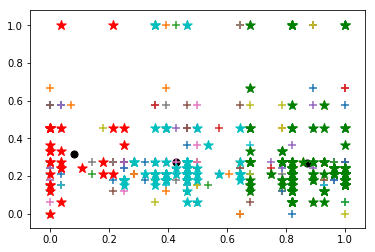

In [14]:
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker = 'o', color = 'k', s=50)
    
for classification in classifications:
    color = colors[classification]
    for next_datapoint in classifications[classification]:
        plt.scatter(next_datapoint[0],next_datapoint[1], marker = "+", s=50)
        

for test in xtest:
    classification = predict(test, centroids)
    plt.scatter(test[0],test[1], marker = '*', color = colors[classification], s=100)